In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv("F:\\iNeuron\\airfoil_self_noise.dat",sep='\t',header=None)

In [3]:
dataset.head(2)

,0,1,2,3,4,5
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201


This problem has the following inputs:
1. Frequency, in Hertzs.
2. Angle of attack, in degrees.
3. Chord length, in meters.
4. Free-stream velocity, in meters per second.
5. Suction side displacement thickness, in meters.

The only output is:
6. Scaled sound pressure level, in decibels.

In [4]:
dataset.columns=["Frequency","Angle of attack","Chord length","Free-stream velocity","Suction side","pressure level"]

In [5]:
dataset.head(2)

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side,pressure level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201


In [6]:
dataset.isnull().sum()

Frequency               0
Angle of attack         0
Chord length            0
Free-stream velocity    0
Suction side            0
pressure level          0
dtype: int64

In [7]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [8]:
# first do train test split
from sklearn.model_selection import train_test_split

In [9]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

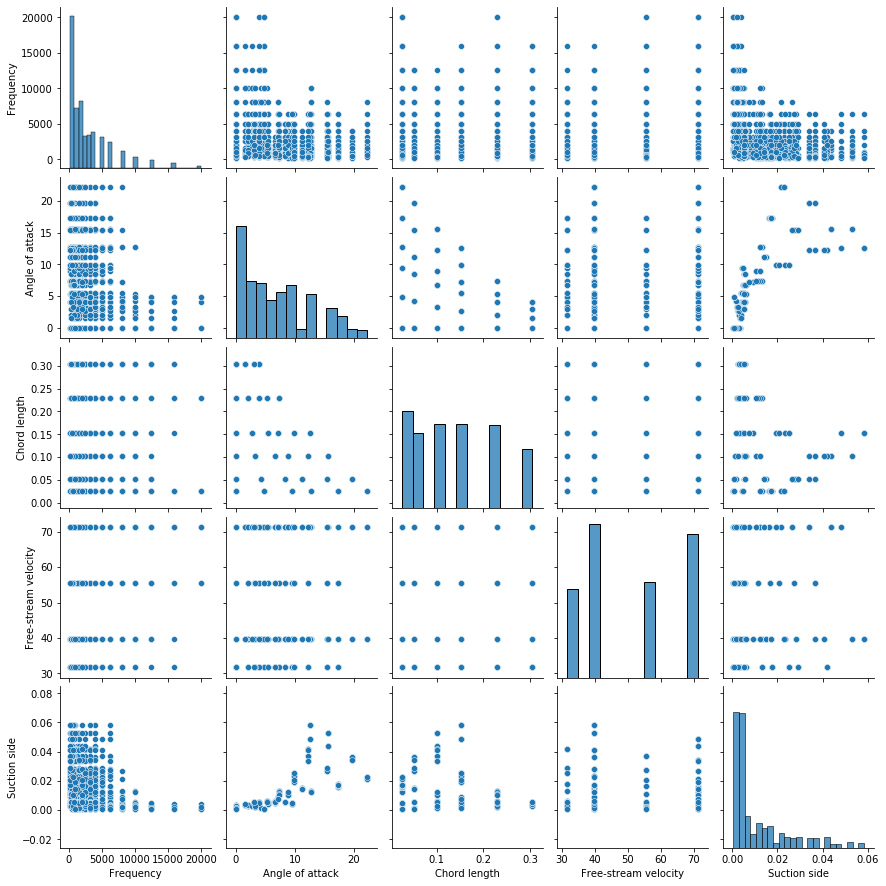

In [10]:
import seaborn as sns
sns.pairplot(X_train)

In [10]:
import matplotlib.pyplot as plt

X_train.corr()

,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side
Frequency,1.000000,-0.288937,0.021492,0.125608,-0.233744
Angle of attack,-0.288937,1.000000,-0.512718,0.061069,0.753011
Chord length,0.021492,-0.512718,1.000000,0.029120,-0.223188
Free-stream velocity,0.125608,0.061069,0.029120,1.000000,0.005569
Suction side,-0.233744,0.753011,-0.223188,0.005569,1.000000


In [14]:
# Pandas Profiling=========== scearch

C:\Users\Swarupa\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


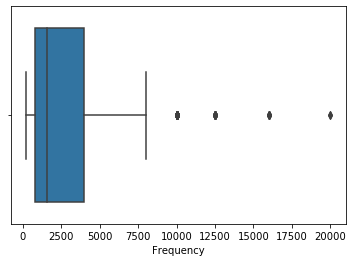

In [15]:
sns.boxplot(X_train["Frequency"])

C:\Users\Swarupa\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


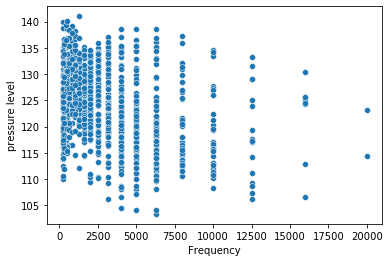

In [16]:
sns.scatterplot(X_train['Frequency'],y)

In [17]:
len(dataset["pressure level"].unique())

1456

C:\Users\Swarupa\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


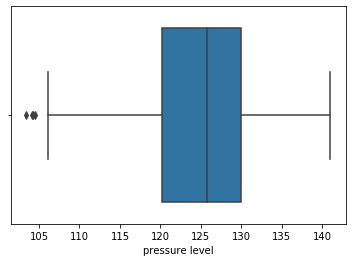

In [45]:
sns.boxplot(dataset['pressure level'])

In [18]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()

In [19]:
model = standard.fit_transform(X_train,y_train)

In [20]:
model

array([[-0.4207562 ,  1.78778088, -1.17597854, -1.2219654 ,  0.49937514],
       [-0.11665578,  0.74307717, -0.90671243, -0.71227359,  0.30063007],
       [ 1.16732378, -0.2342263 ,  0.17035203,  0.31356182, -0.51363122],
       ...,
       [ 0.10297231, -0.2342263 ,  0.17035203, -1.2219654 , -0.44357611],
       [-0.82622343,  0.92842783, -0.3681802 ,  1.33294543,  1.72408951],
       [ 1.16732378, -1.14412953,  0.17035203,  0.31356182, -0.71168476]])

In [21]:
from sklearn.linear_model import LinearRegression


In [39]:
lin_regressor=LinearRegression()
lin_regressor.fit(X_train,y_train)
r2_score = lin_regressor.score(X_test,y_test)
r2_score

0.5380712035834877

DECISION TREE REGRESSOR

In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import tree
treeregressor = DecisionTreeRegressor(criterion="entropy")

In [39]:
parameters = {'max_depth':[2,4,8,10,12,14,16],
             'min_samples_split':[2,3,4],
             'min_samples_leaf':[1,2]}
reg = tree.DecisionTreeRegressor()
# classifier.fit(X_train,y_train)
TreeRegressor = GridSearchCV(reg,parameters)
TreeRegressor.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 4, 8, 10, 12, 14, 16],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

In [40]:
tree = DecisionTreeRegressor(splitter="best",max_depth=10)
tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=10)

In [46]:
pred = TreeRegressor.predict(X_test)

In [37]:
r2_score = tree.score(X_test,y_test)
r2_score

0.8168036893396046

In [38]:
print(TreeRegressor.best_score_)

0.8204567534747091


In [39]:
print(TreeRegressor.best_params_)

{'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 2}


Ridge and Lasso Regressor

In [40]:
from sklearn.linear_model import Ridge
ridge=Ridge()

In [41]:
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,60]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 60]},
             scoring='neg_mean_squared_error')

In [42]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 1e-08}
-24.45771793823024


In [45]:
prediction_ridge=ridge_regressor.predict(X_test)

In [47]:
from sklearn.metrics import r2_score
r2_score(y_test,prediction_ridge)

0.5418877468982494

In [14]:
from sklearn.linear_model import Lasso
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X_train,y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

C:\Users\Swarupa\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11020.844177840638, tolerance: 4.409074965077248
  positive)
C:\Users\Swarupa\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10133.830831844456, tolerance: 4.206916029948058
  positive)
C:\Users\Swarupa\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11335.057066623074, tolerance: 4.475893004936253
  positive)
C:\Users\Swarupa\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations

{'alpha': 1e-08}
-24.384589137125197


In [15]:
prediction_lasso=lasso_regressor.predict(X_test)

In [16]:
from sklearn.metrics import r2_score
r2_score(y_test,prediction_lasso)

0.565039689253332

In [57]:
from sklearn.ensemble import RandomForestRegressor
rand_reg = RandomForestRegressor(n_estimators=15)

In [58]:
parameters = {'max_depth':[2,4,8,10,12,14,16],
             'min_samples_split':[2,3,4],
             'min_samples_leaf':[1,2]}

In [59]:
Randomforestregressor = GridSearchCV(rand_reg,parameters)
Randomforestregressor.fit (X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(n_estimators=15),
             param_grid={'max_depth': [2, 4, 8, 10, 12, 14, 16],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

In [60]:
pred = Randomforestregressor.predict(X_test)

In [61]:
r2_score = Randomforestregressor.score(X_test,y_test)
r2_score

0.9219840633484597

In [62]:
print(Randomforestregressor.best_params_)

{'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 3}


In [63]:
print(Randomforestregressor.best_score_)

0.9026448093126769


In [96]:
import pickle
pickle.dump(Randomforestregressor,open('model.pkl','wb'))

In [97]:
pickle_model = pickle.load(open('model.pkl','rb'))
#batch input
pickle_model.predict(X_test)

array([126.02539444, 112.22724444, 126.47534778, 129.51067778,
       116.42523333, 122.38373   , 134.00113889, 132.47744501,
       129.46175111, 127.27573889, 121.79471111, 126.32755556,
       126.67788333, 119.30822963, 132.54000556, 124.46045333,
       123.29197333, 118.57044571, 111.3362    , 128.12752889,
       129.50404444, 128.23775   , 121.3466    , 129.31894762,
       134.91747778, 122.34057222, 131.01706667, 124.17628667,
       126.62738889, 129.19923333, 120.67189185, 126.41863889,
       128.67758   , 125.47499444, 128.06976111, 123.05287778,
       126.83068222, 116.514     , 123.89457222, 121.79526667,
       118.85993333, 119.14409222, 124.11495667, 122.16269444,
       126.88740222, 132.97842   , 130.62761667, 115.55278333,
       130.12126667, 126.90556667, 121.69655778, 134.85717778,
       131.72384444, 126.59619444, 136.65058333, 131.21146111,
       130.90176333, 131.09956019, 127.49685556, 126.63282556,
       128.17963111, 125.91413333, 114.35765444, 134.67

In [71]:
X_test.iloc[51]

Frequency               5000.000000
Angle of attack            4.800000
Chord length               0.025400
Free-stream velocity      39.600000
Suction side               0.000907
Name: 1040, dtype: float64

In [86]:
data_dict={'Frequency':8,
           'Angle of attack':4,
           'Chord length ':9,
           'Free-stream velocity':1,
           'Suction side':6
          }

In [87]:
data_dict.values()

dict_values([8, 4, 9, 1, 6])

In [88]:
type(data_dict.values())

dict_values

In [89]:
list(data_dict.values())

[8, 4, 9, 1, 6]

In [93]:
# bcoz list values are 1D array its giving error to convert it into 2D
pickle_model.predict(list(data_dict.values()))

# ValueError: Expected 2D array, got 1D array instead:
# array=[8. 4. 9. 1. 6.].
# Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.


In [91]:
#converting into 2D
pickle_model.predict([list(data_dict.values())])

array([118.3186])